In [44]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
from pandas.plotting import parallel_coordinates

In [11]:
df = pd.read_csv("book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
for item in [0.01,0.05,0.1]:
  frequent_item = apriori(df,min_support=item,use_colnames=True)
  print('min support, {}'.format(frequent_item))

min support,      support                                           itemsets
0     0.4230                                         (ChildBks)
1     0.2475                                         (YouthBks)
2     0.4310                                          (CookBks)
3     0.2820                                         (DoItYBks)
4     0.2145                                           (RefBks)
..       ...                                                ...
589   0.0125  (ItalCook, CookBks, ItalArt, ArtBks, ItalAtlas...
590   0.0145  (GeogBks, CookBks, ArtBks, YouthBks, RefBks, D...
591   0.0105  (GeogBks, ItalCook, CookBks, ItalArt, ArtBks, ...
592   0.0100  (GeogBks, ItalCook, CookBks, ItalArt, ArtBks, ...
593   0.0110  (ItalCook, CookBks, ItalArt, ArtBks, ItalAtlas...

[594 rows x 2 columns]
min support,     support                                          itemsets
0    0.4230                                        (ChildBks)
1    0.2475                                        (YouthB

here after checking all value 0.05 min_supportis good for freqent item



In [15]:
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
95,0.0600,"(YouthBks, GeogBks, CookBks, DoItYBks)",4
96,0.0560,"(YouthBks, ArtBks, CookBks, GeogBks)",4
97,0.0650,"(GeogBks, ArtBks, CookBks, DoItYBks)",4
98,0.0510,"(GeogBks, CookBks, YouthBks, DoItYBks, ChildBks)",5


In [28]:
freq1=frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.05) ]
freq1.shape

(9, 3)

In [27]:
freq2=frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.05) ]
freq2.shape     

(27, 3)

In [26]:
freq3 = frequent_itemsets[(frequent_itemsets['length']==3) & (frequent_itemsets['support']>=0.05)]
freq3.shape

(40, 3)

In [25]:
freq4 = frequent_itemsets[(frequent_itemsets['length']==4) & (frequent_itemsets['support']>=0.05) ]
freq4.shape

(22, 3)

There are 9 Itemsets with 1 antacidents about 50% support
There are 27 Itemsets with 2 antacidents about 50% support
There are 40 Itemsets with 3 antacidents about 50% support
There are 22 Itemsets with 4 antacidents about 50% support 


In [29]:
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(GeogBks),"(ArtBks, CookBks, DoItYBks, ChildBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
658,(CookBks),"(ArtBks, GeogBks, DoItYBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(ArtBks),"(ChildBks, GeogBks, CookBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
660,(DoItYBks),"(ArtBks, GeogBks, CookBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

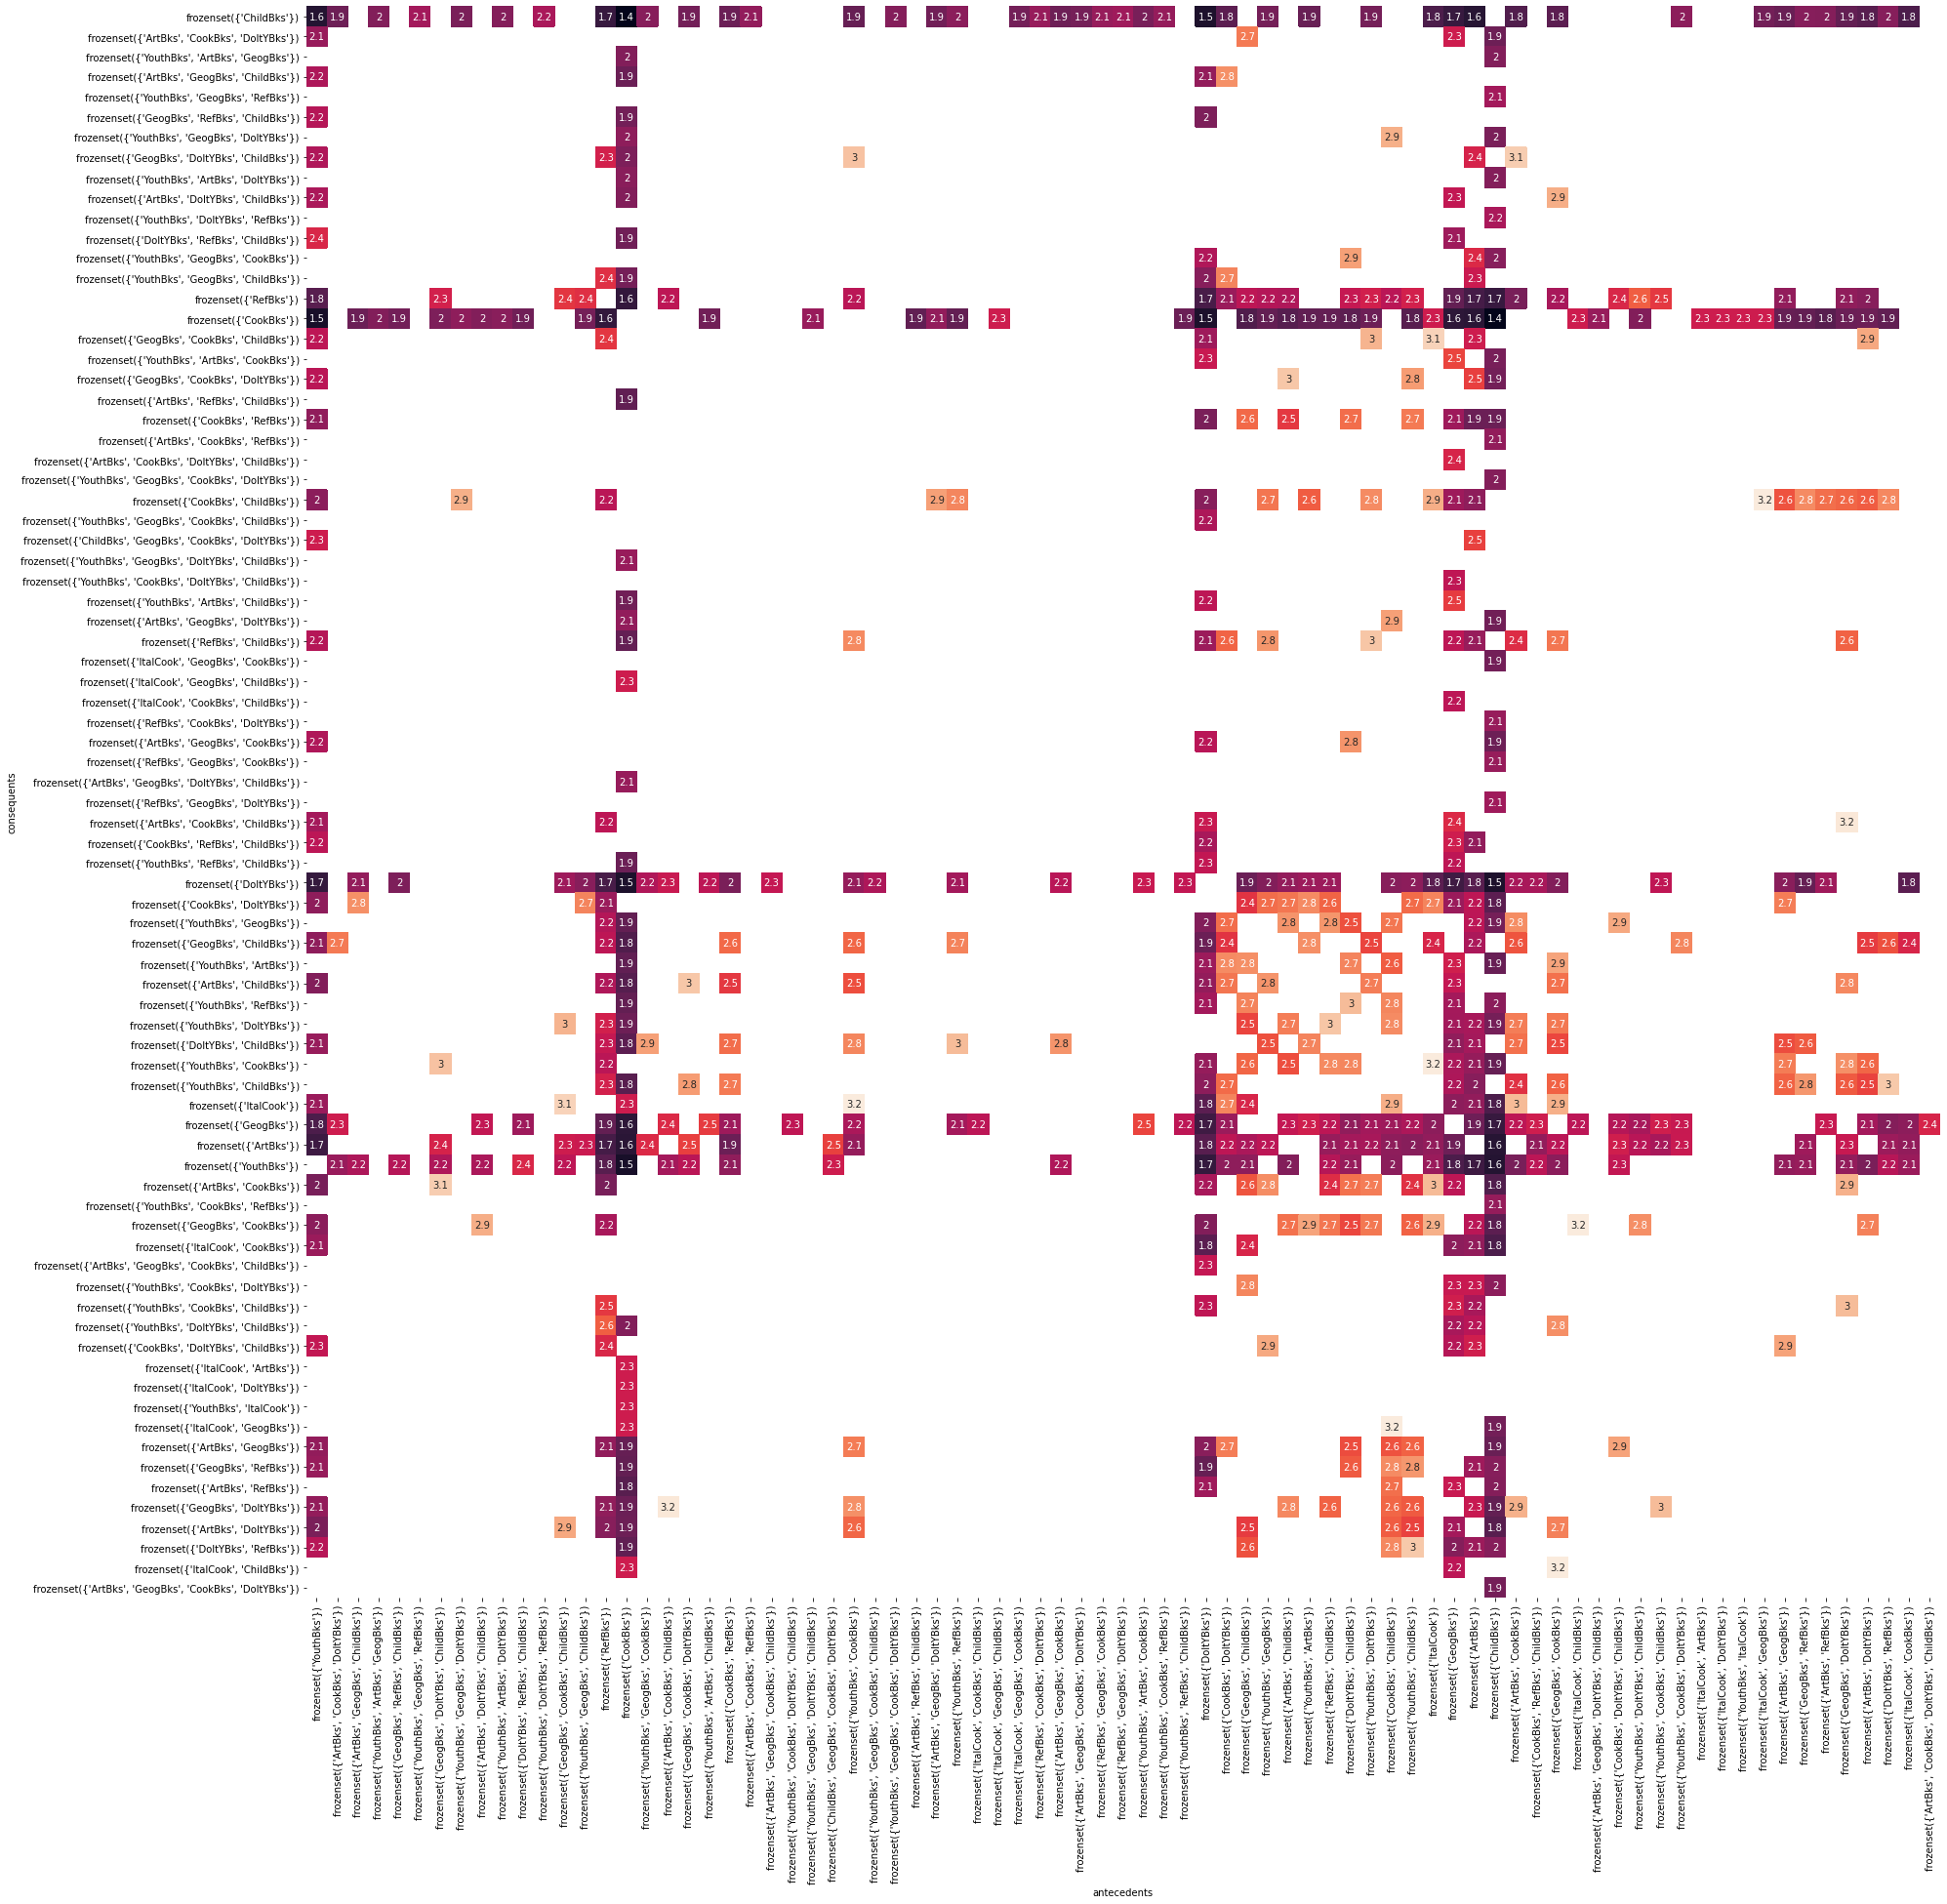

In [34]:
fig, ax = plt.subplots(figsize = (30,30))
pivot = rules.pivot(index = 'consequents', 
                   columns = 'antecedents', values= 'lift')
sns.heatmap(pivot,annot=True,cbar=False,ax = ax)
plt.show()

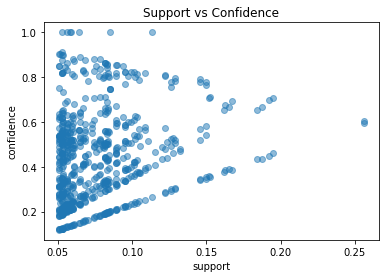

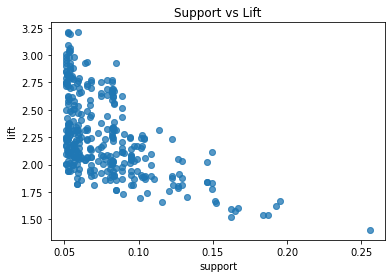

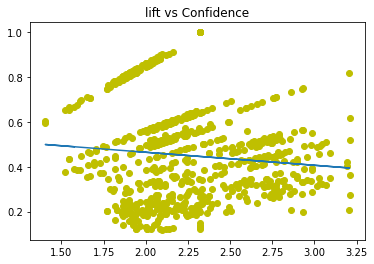

In [39]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'],alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
plt.scatter(rules['support'],rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.title('lift vs Confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [40]:
rules.sort_values('lift',ascending = False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
180,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
185,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
510,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
511,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
513,"(CookBks, ChildBks)","(ItalCook, GeogBks)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474


In [42]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedents : list(antecedents)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequents : list(consequents)[0])
rules['rule'] = rules.index
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent,rule
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,YouthBks,ChildBks,0
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,ChildBks,YouthBks,1
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,CookBks,ChildBks,2
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,ChildBks,CookBks,3
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,DoItYBks,ChildBks,4
...,...,...,...,...,...,...,...,...,...,...,...,...
657,(GeogBks),"(ArtBks, CookBks, DoItYBks, ChildBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,GeogBks,ArtBks,657
658,(CookBks),"(ArtBks, GeogBks, DoItYBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,CookBks,ArtBks,658
659,(ArtBks),"(ChildBks, GeogBks, CookBks, DoItYBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,ArtBks,ChildBks,659
660,(DoItYBks),"(ArtBks, GeogBks, CookBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,DoItYBks,ArtBks,660


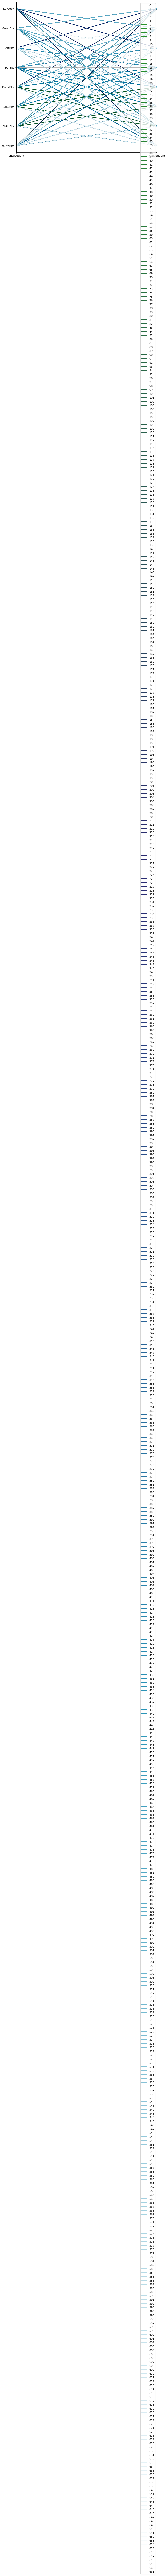

In [48]:
plt.figure(figsize=(20, 10), dpi= 80)
plt.subplot(1, 2, 1)
cords = rules[['antecedent','consequent','rule']]
parallel_coordinates(cords,'rule',colormap = 'ocean')
plt.show()
